In [1]:
# Pacotes iniciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize']=(10,10)

import os
os.chdir('..')
os.getcwd()

'/media/fellipegm/Data/Drive/07 Projetos/Projeto-CESAR'

### Load data, clean and perform the PCA

In [2]:
from functions.data_loading import DataLoad

data = DataLoad()

### Test of the most simple model (Linear Regression), using the PCA variables

In [3]:
from sklearn.linear_model import LinearRegression
from functions.metrics import Metrics

linreg = dict()
y_pred_linreg = dict()
stats_linreg = dict()

variables = ['Tmax', 'Tmin']

for variable in variables:
    linreg[variable] = dict()
    y_pred_linreg[variable] = dict()
    stats_linreg[variable] = dict()
    for i in range(1, 26):
        linreg[variable][i] = LinearRegression()
        linreg[variable][i].fit(data.df_train[i], data.y_train[i][f'Next_{variable}'])
        y_pred_linreg[variable][i] = linreg[variable][i].predict(data.df_test[i])
        interm = Metrics(data.y_test[i][f'Next_{variable}'], y_pred_linreg[variable][i])
        stats_linreg[variable][i] = interm.fit()

### Check the same scores for the LDAPS Tmax and Tmin variables

The same scores are calculated for the LDAPS model Tmax and Tmin air temperatures. Need to check if something is improving.

In [4]:
stats_LDAPS = dict()

for variable in variables:
    stats_LDAPS[variable] = dict()
    for i in range(1, 26):
        interm = Metrics(data.y_test[i][f'Next_{variable}'], data.df_test[i][f'LDAPS_{variable}_lapse'])
        stats_LDAPS[variable][i] = interm.fit()

### Comparison of the residual mean, Root Mean Squared Error and R^2

The R^2 and Root Mean Squared Error are the two common indexes used to evaluate the models prediction performance.

The R^2 index is used to determine how much of the dependent variable variance is explained by the model. The closer the R^2 index is to one, the better the model is able to predict the dependent variable.

The RMSE is the root of the average of the squared residuals. Small values of RMSE indicate that the residual values are small and the model performs well.

The residual mean is used to determine the average prediction error that the model presents.

The LDAPS and Linear Regression model indexes are compared, to evaluate whether the Linear Regression is able to improve the original LDAPS predictions. The method used to visualize the performances is to use a boxplot, where the 25 different stations indexes are considered as a stochastic distribution.

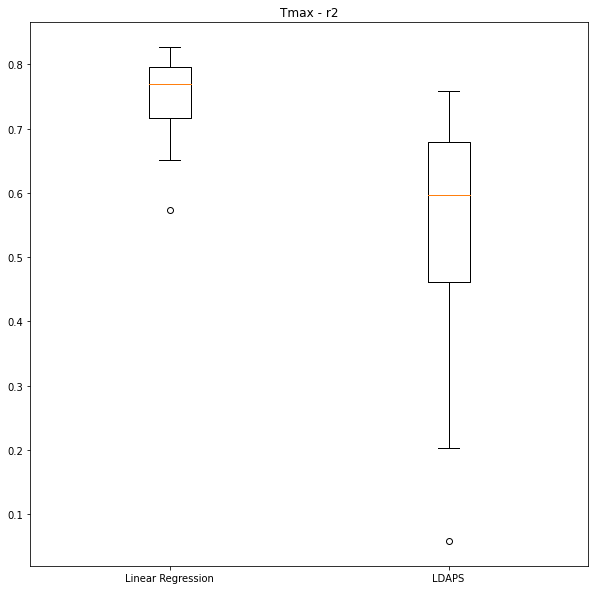

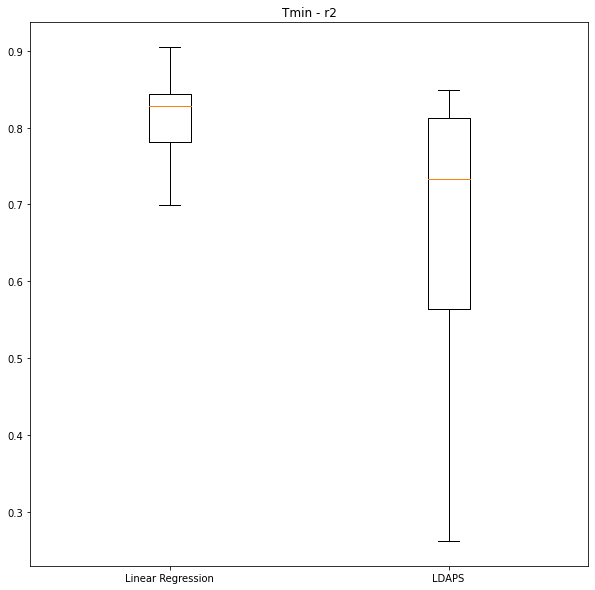

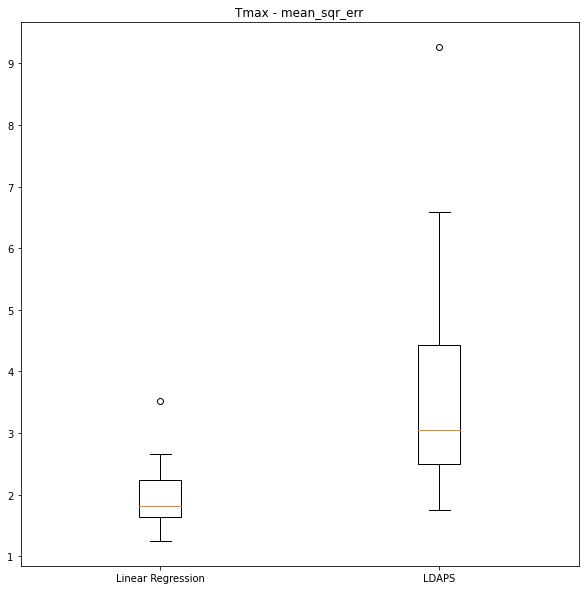

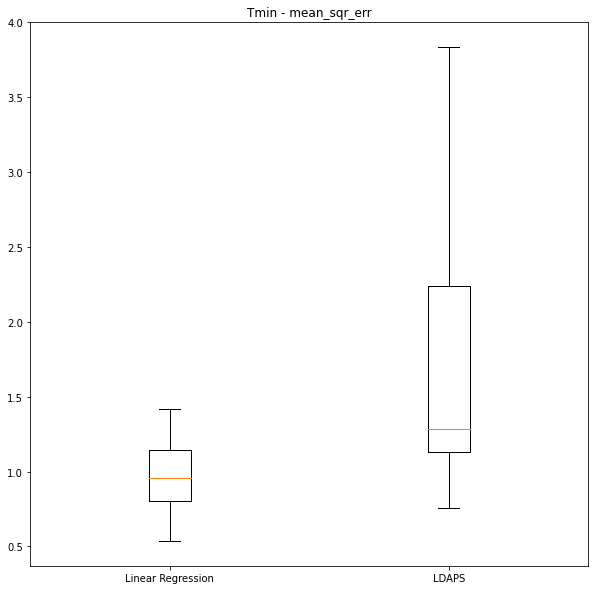

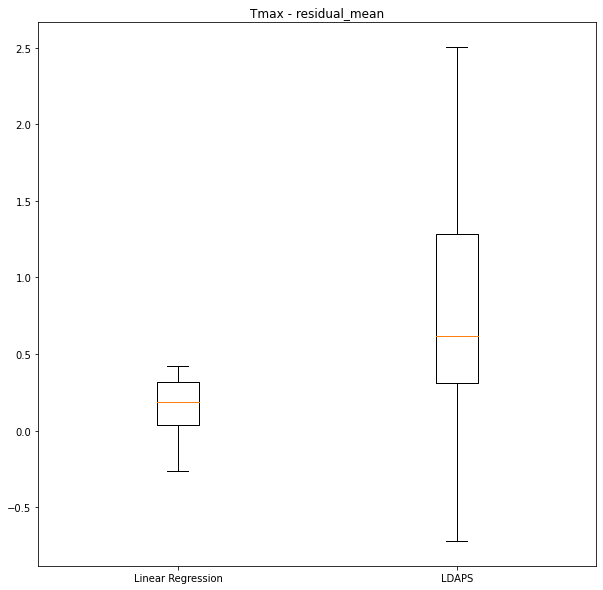

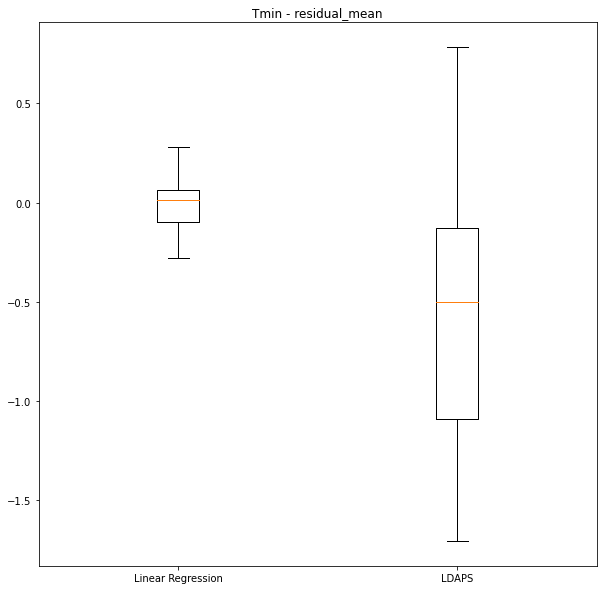

In [5]:
stats = ['r2', 'mean_sqr_err', 'residual_mean']

for stat in stats:
    for variable in variables:
        plt.figure()
        plt.title(f'{variable} - {stat}')
        measure = [stats_linreg[variable][i][stat] for i in range(1, 26)]
        measure_LDAPS = [stats_LDAPS[variable][i][stat] for i in range(1, 26)]

        plt.boxplot([measure, measure_LDAPS], labels=['Linear Regression', 'LDAPS'])
            

From the boxplot presented above, it is clear that the Linear Regression models were able to improve dramatically the air temperature prediction accuracy. The residual mean values are much closer to zero, the R^2 values are closer to 1 and the RMSE is smaller. Therefore, even the simplest model is able to improve the LDAPS air temperature prediction performance.

Let's plot some graphics to check if it is possible to visualize the improvement.

/tmp/ipykernel_51767/2569386754.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


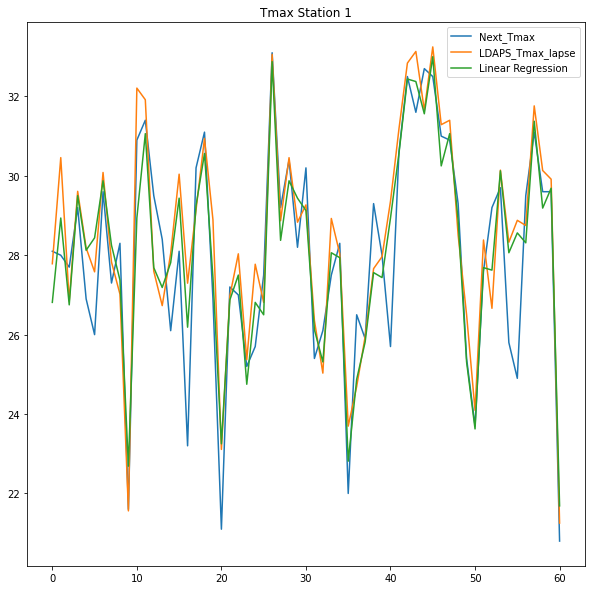

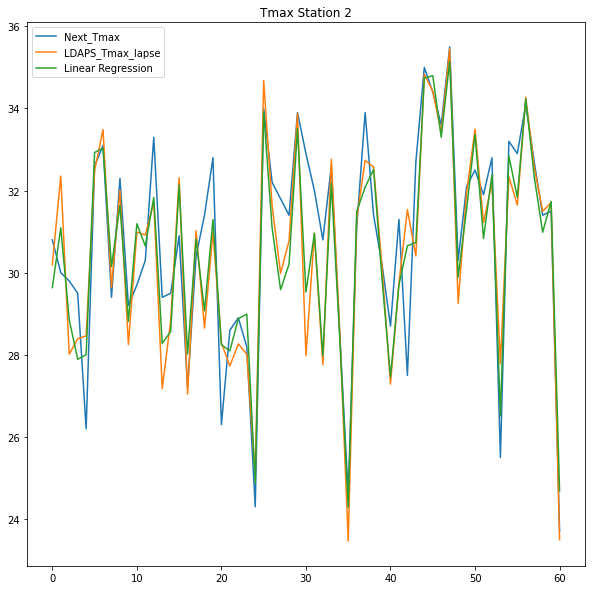

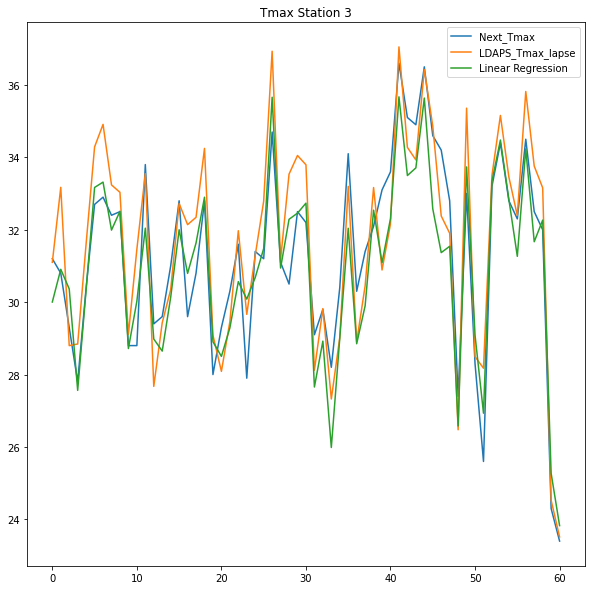

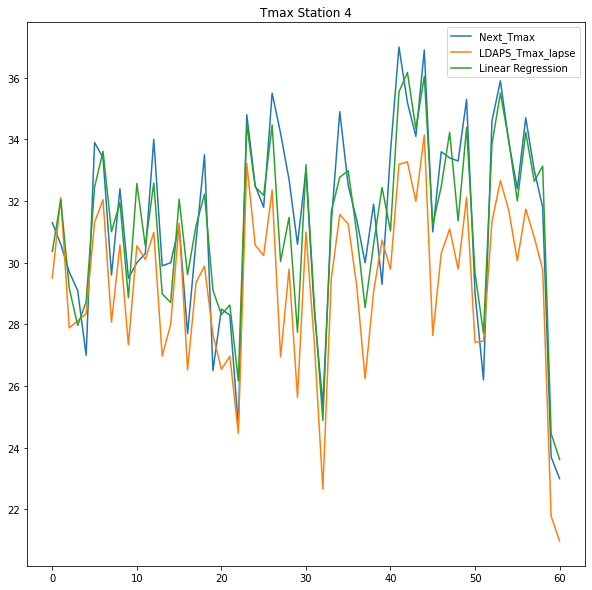

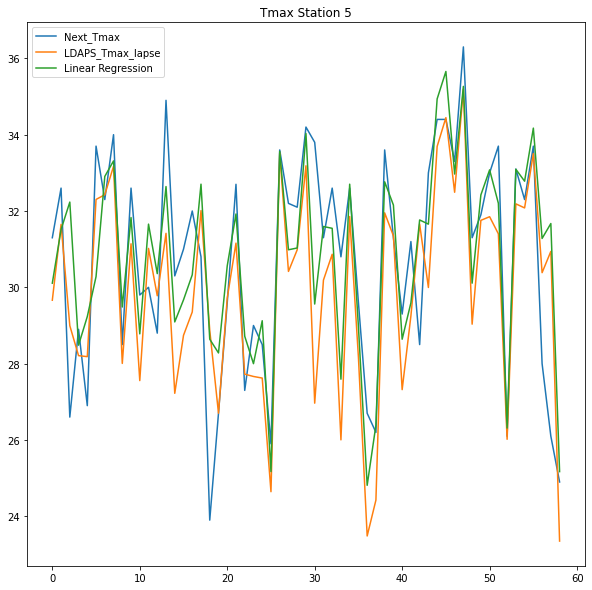

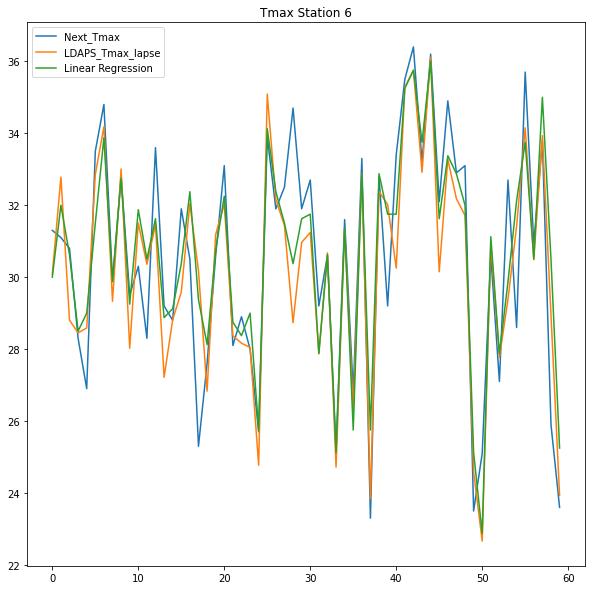

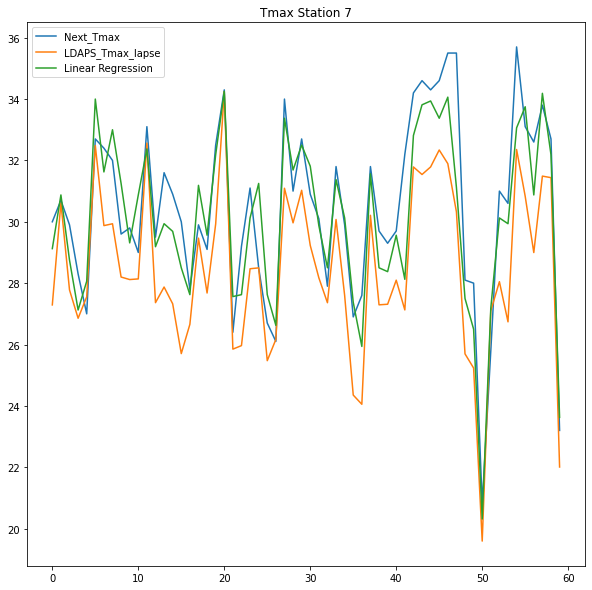

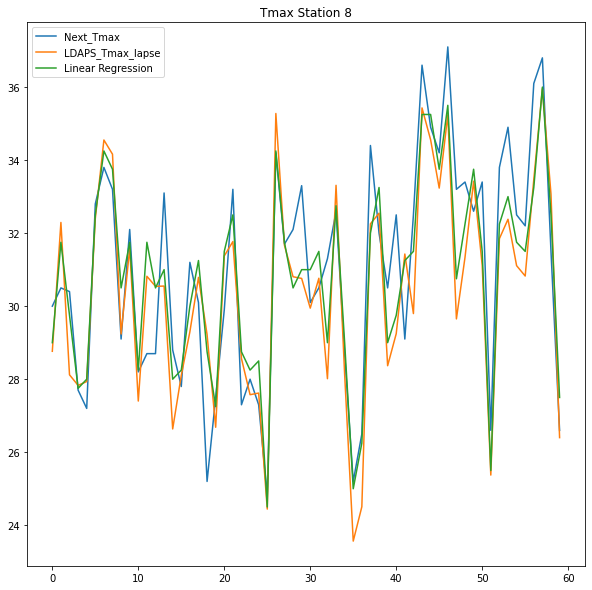

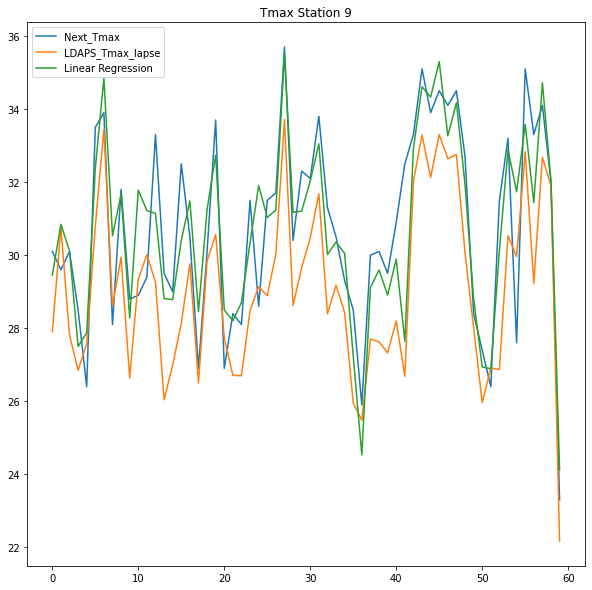

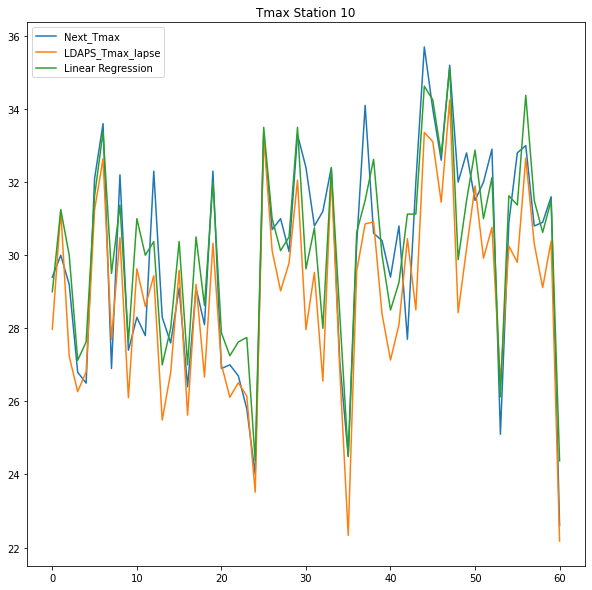

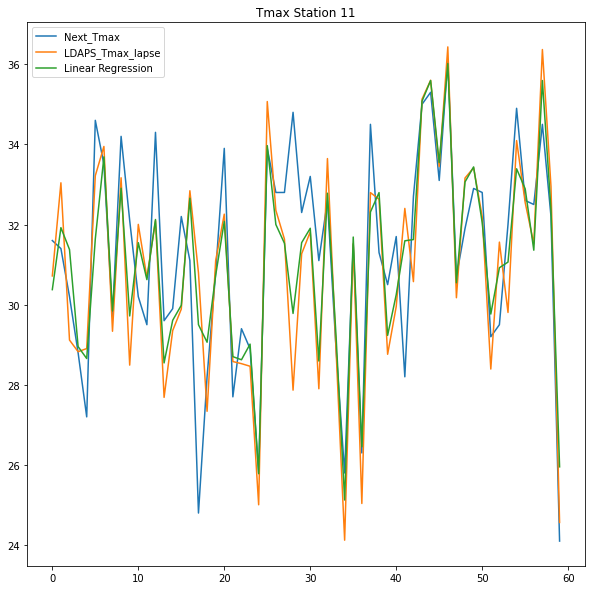

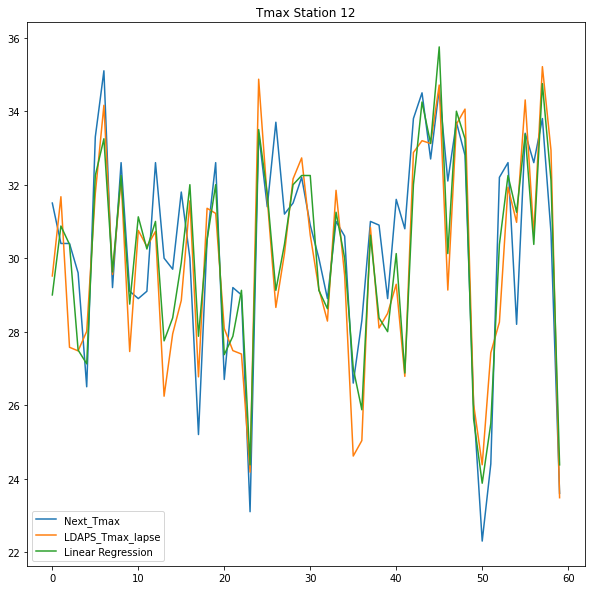

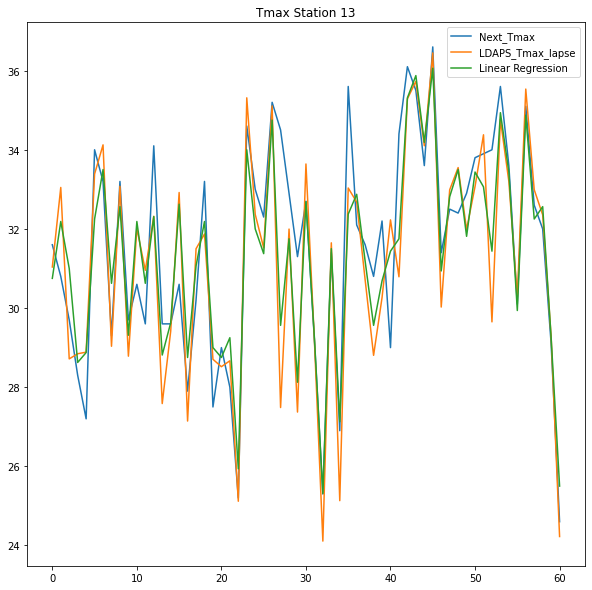

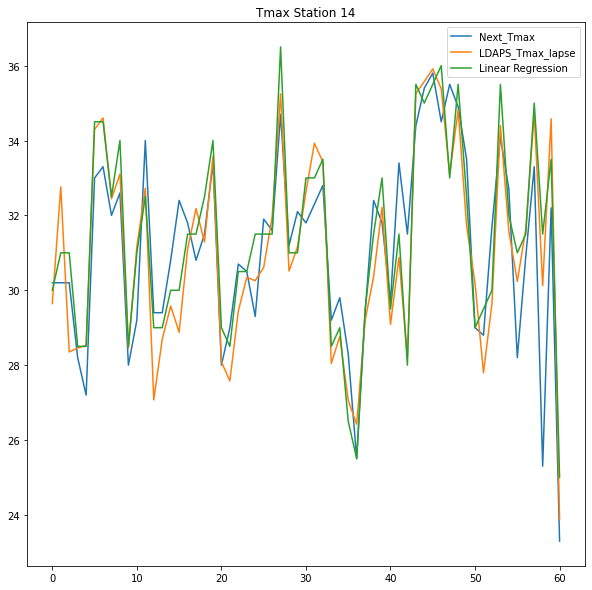

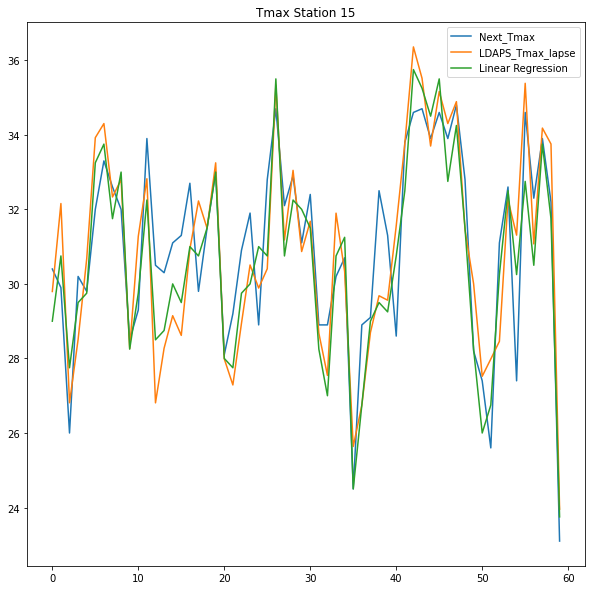

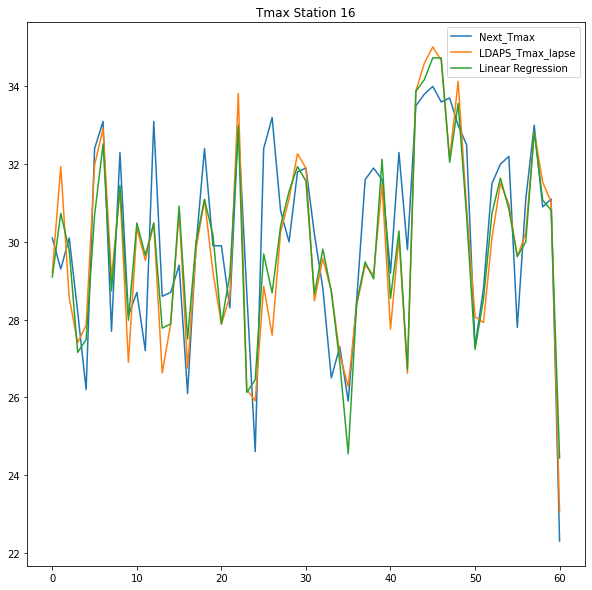

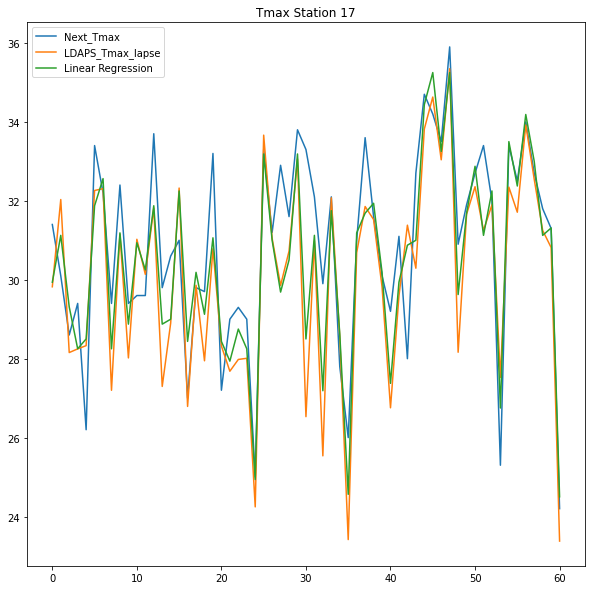

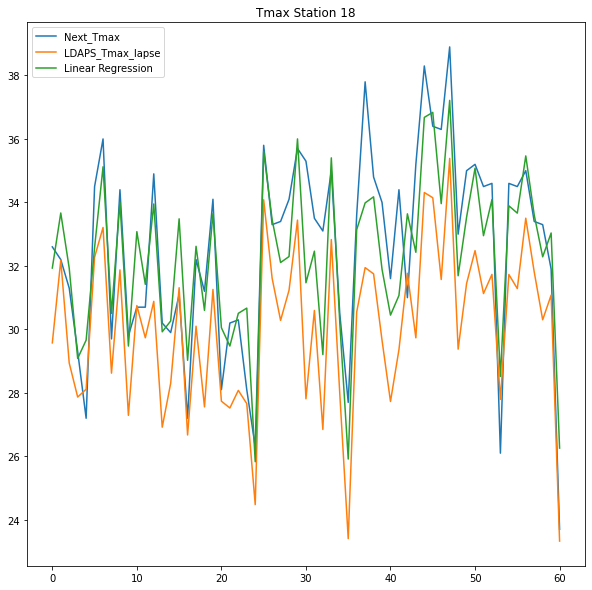

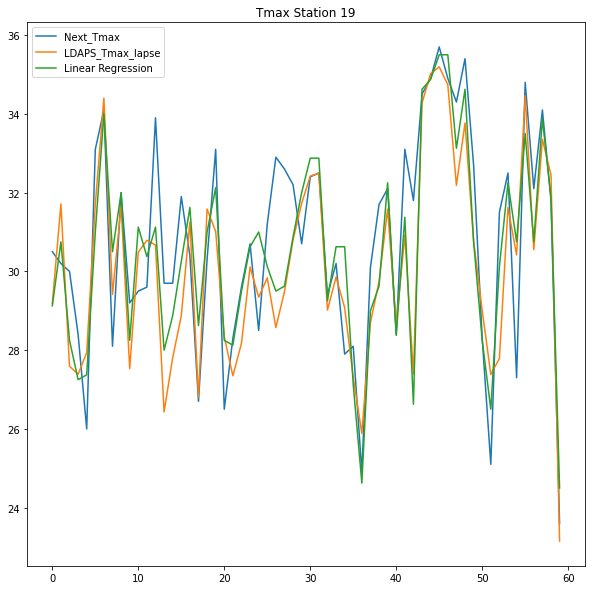

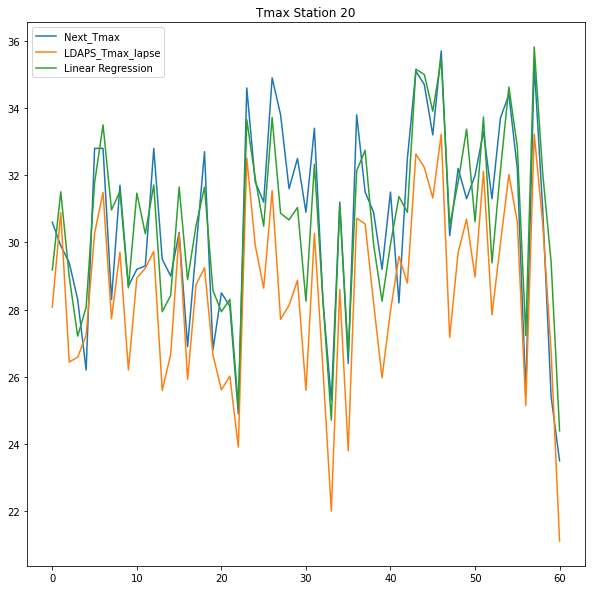

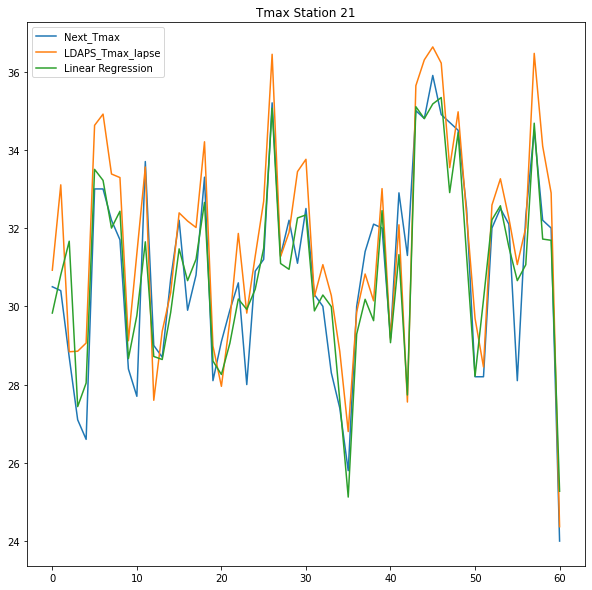

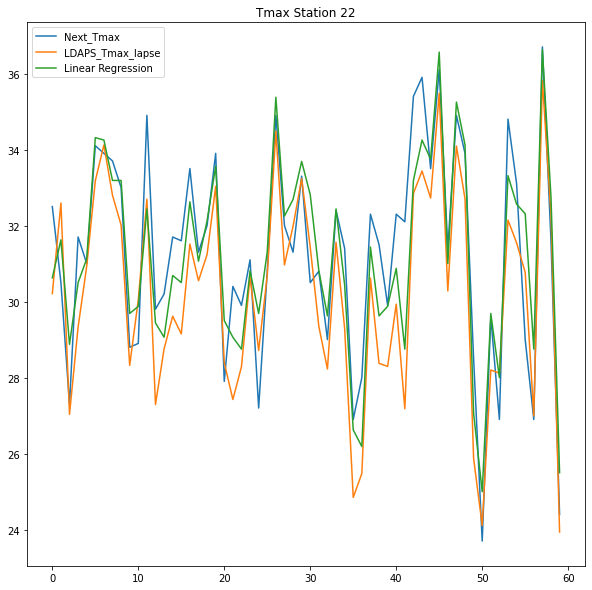

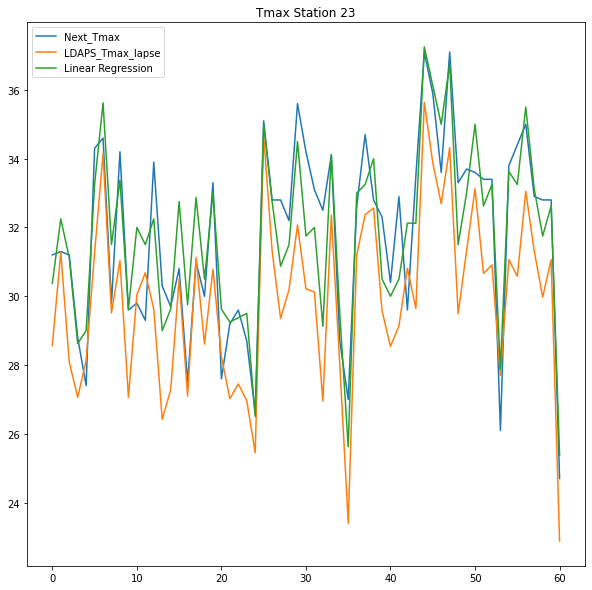

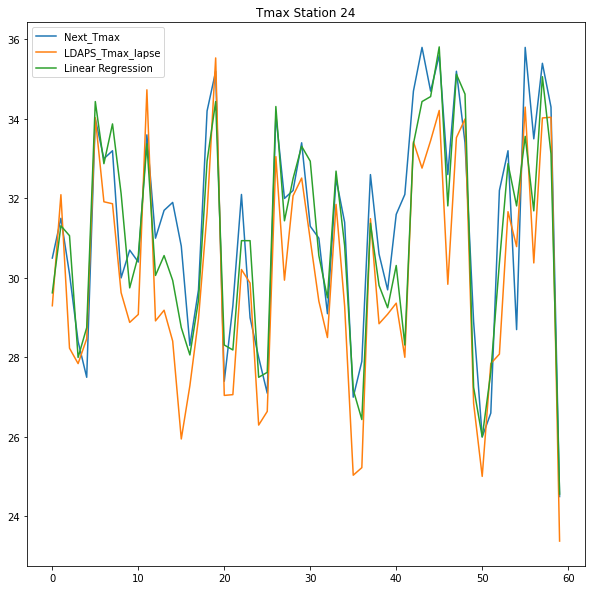

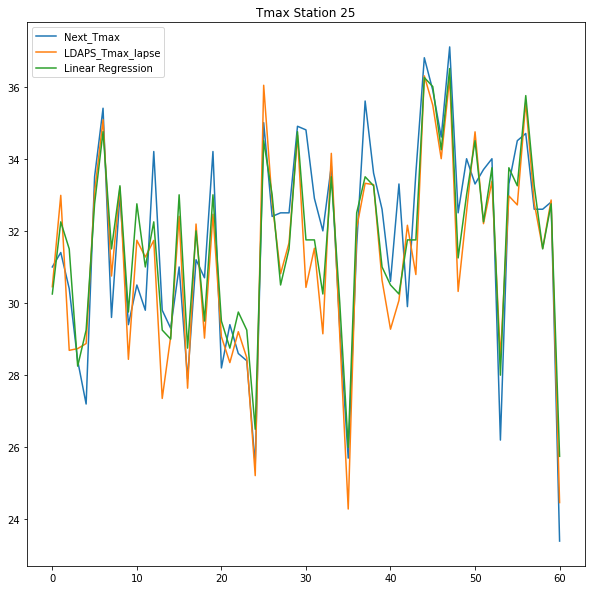

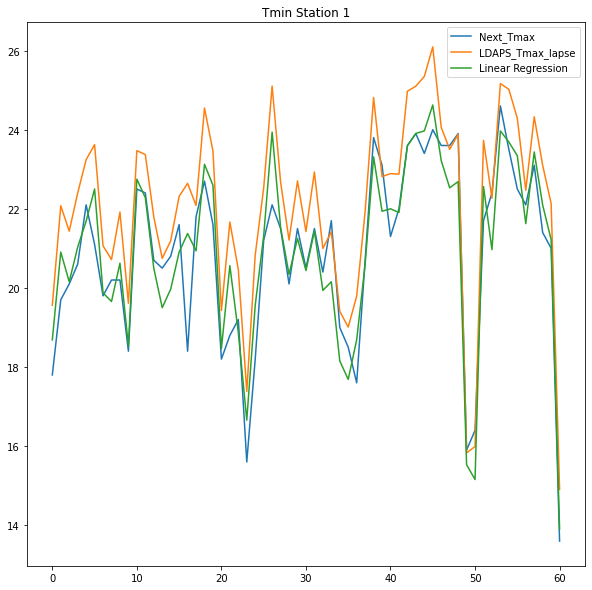

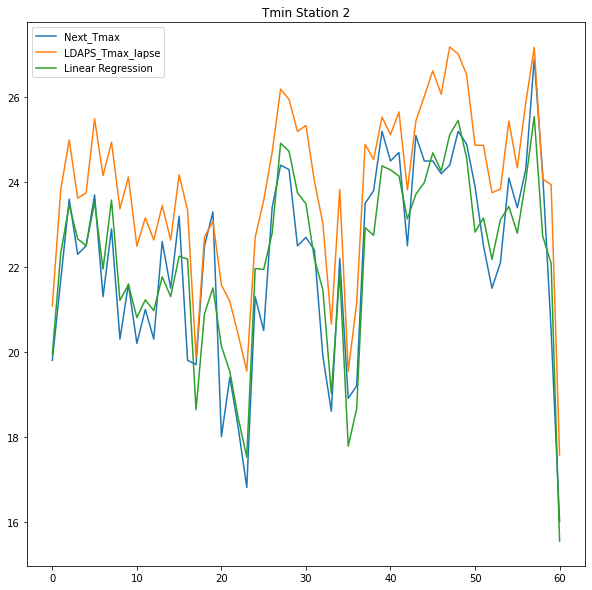

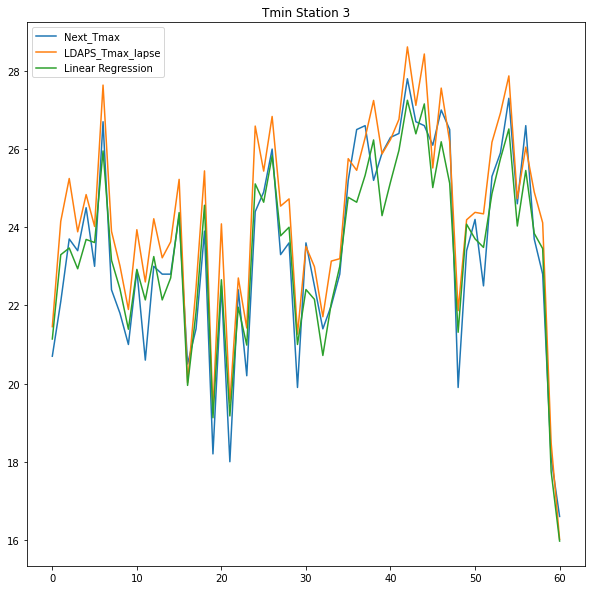

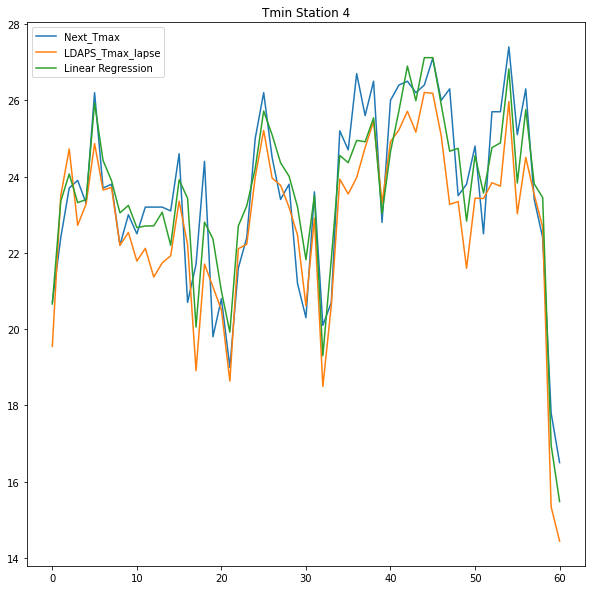

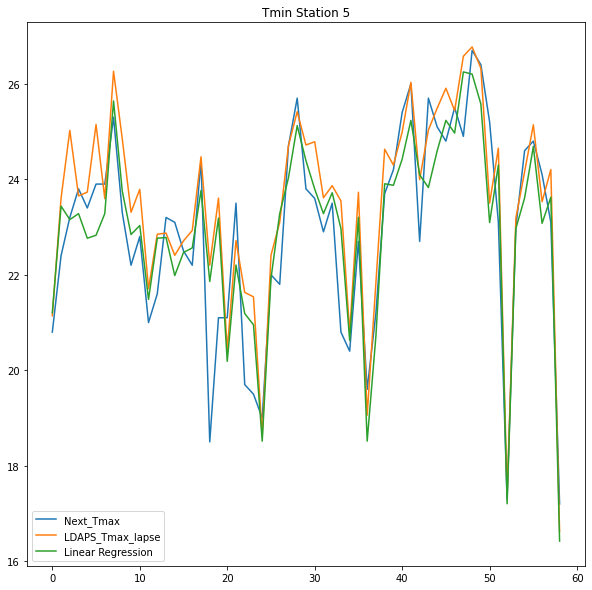

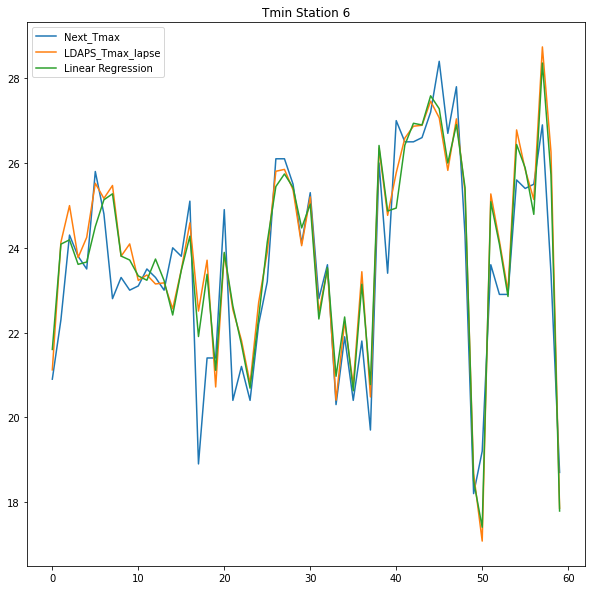

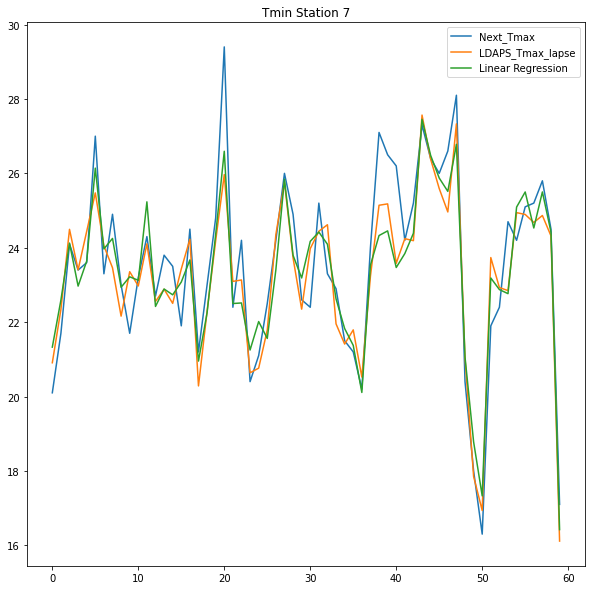

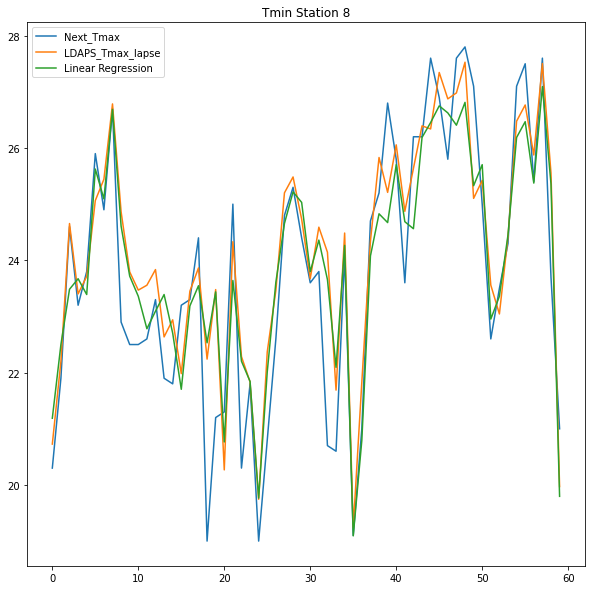

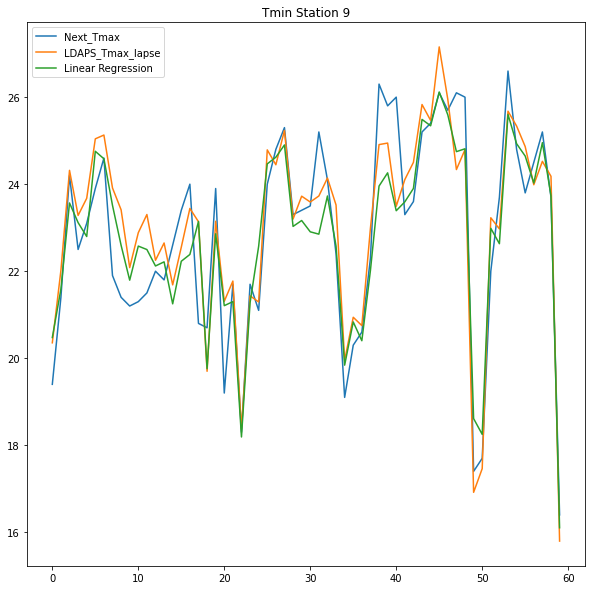

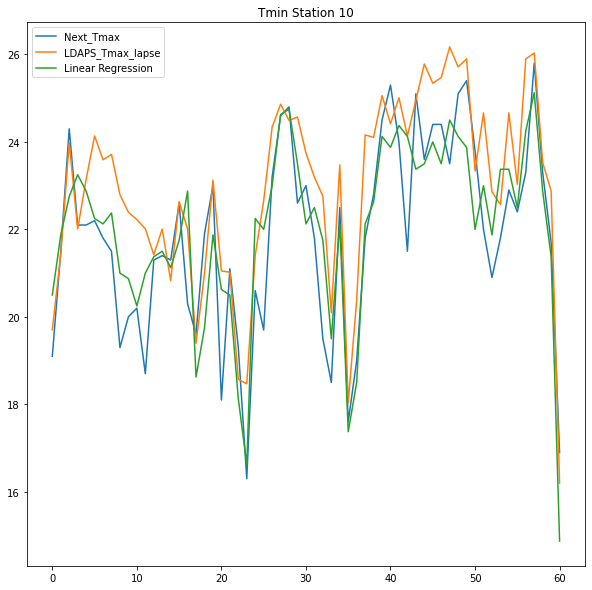

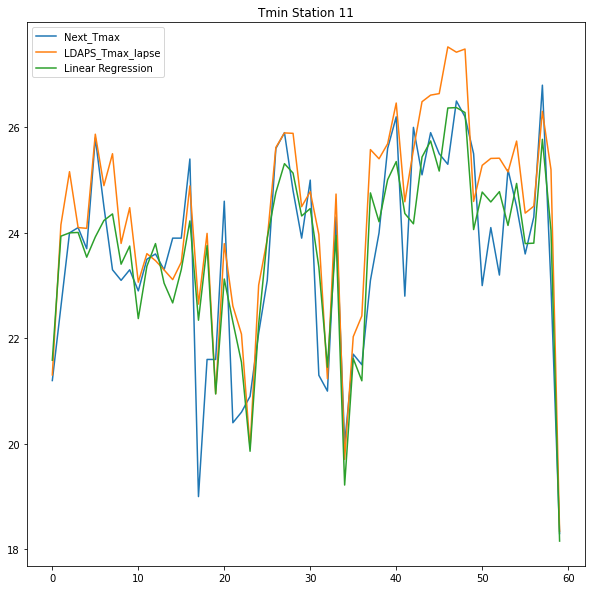

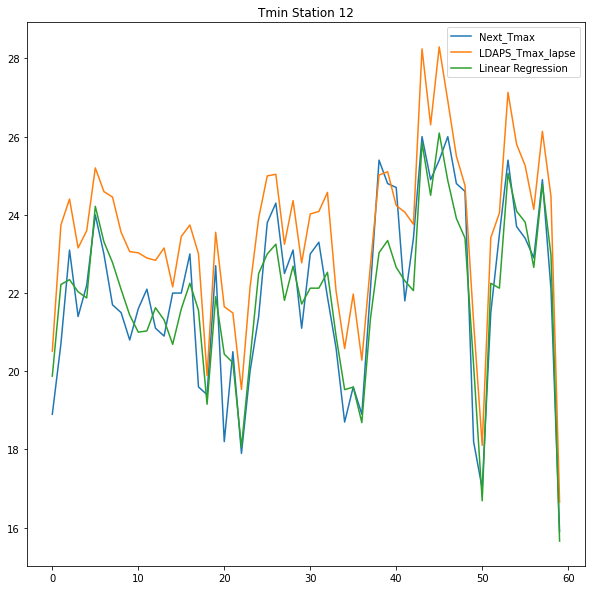

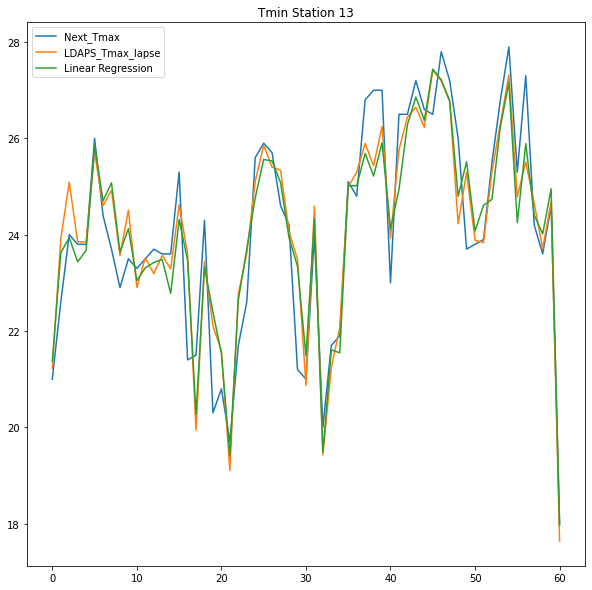

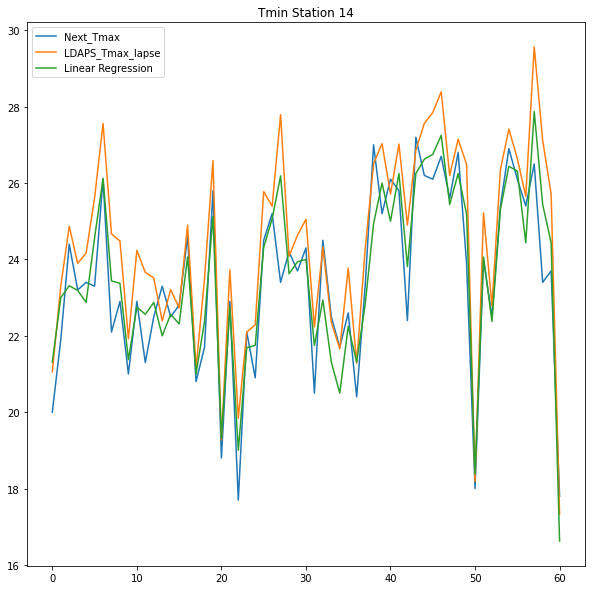

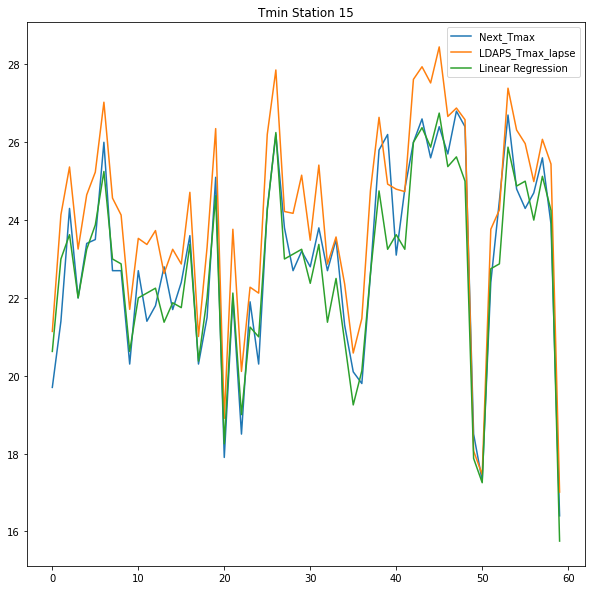

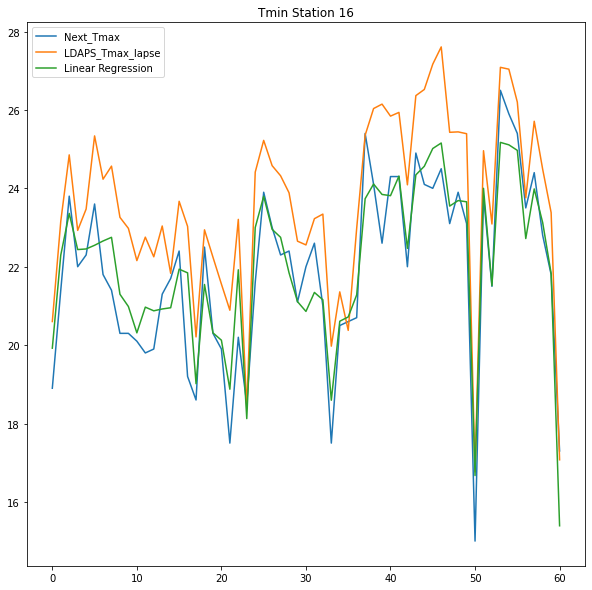

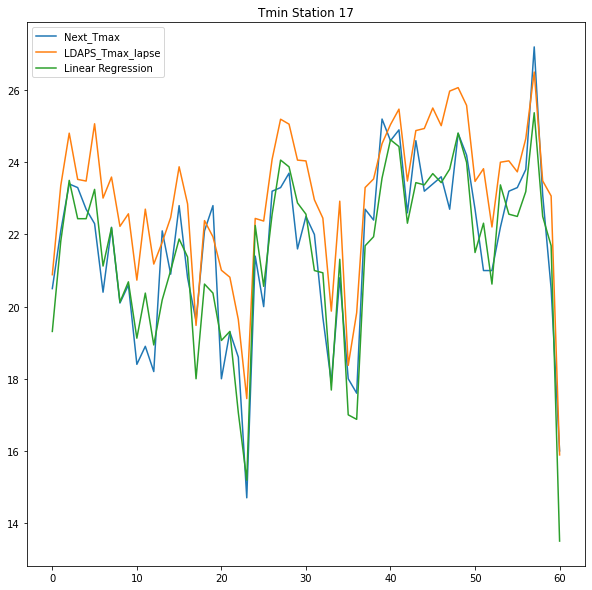

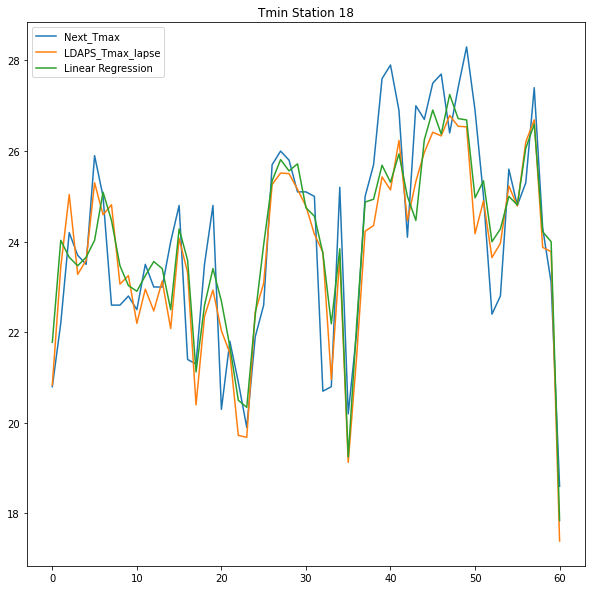

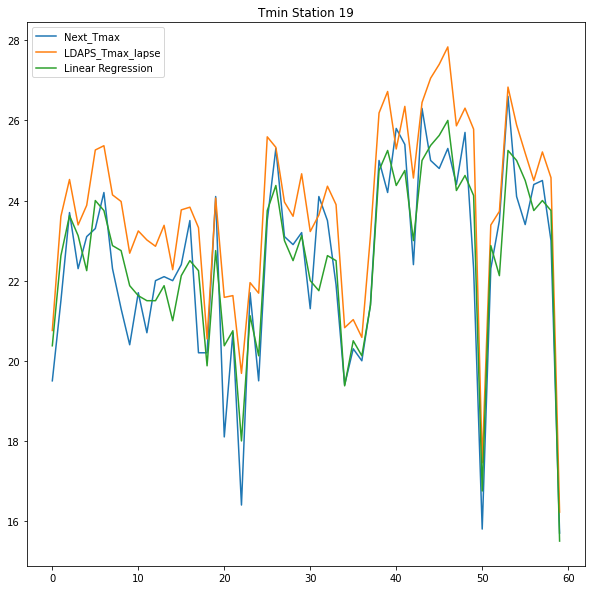

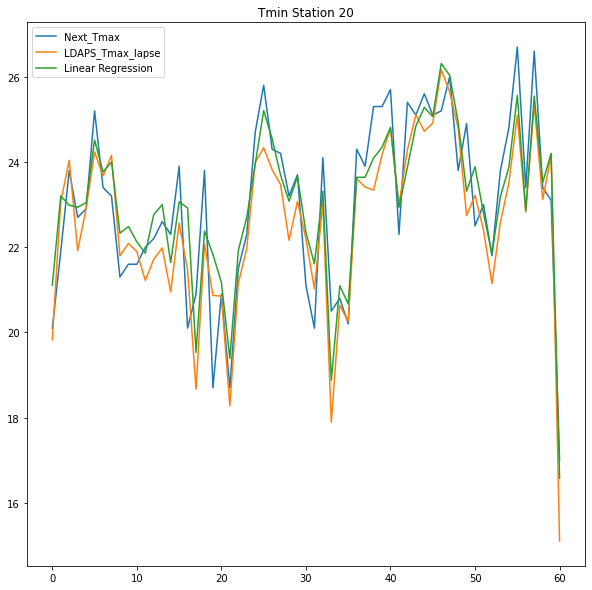

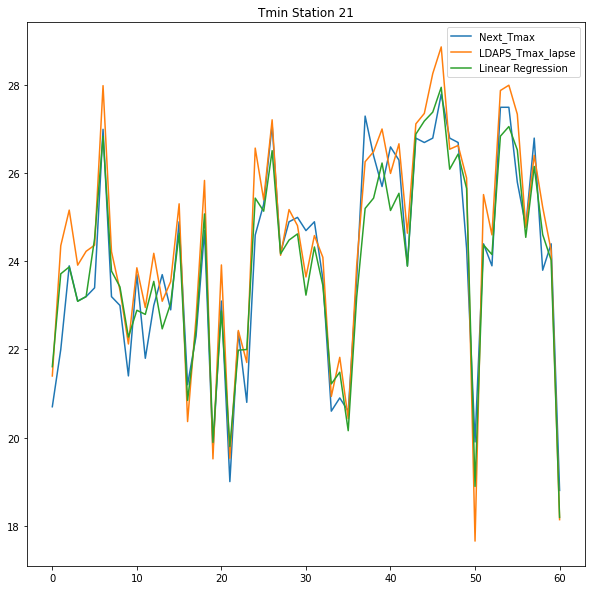

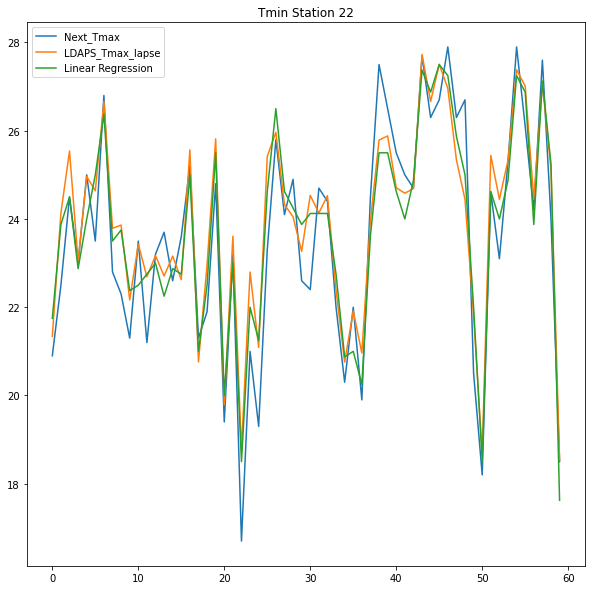

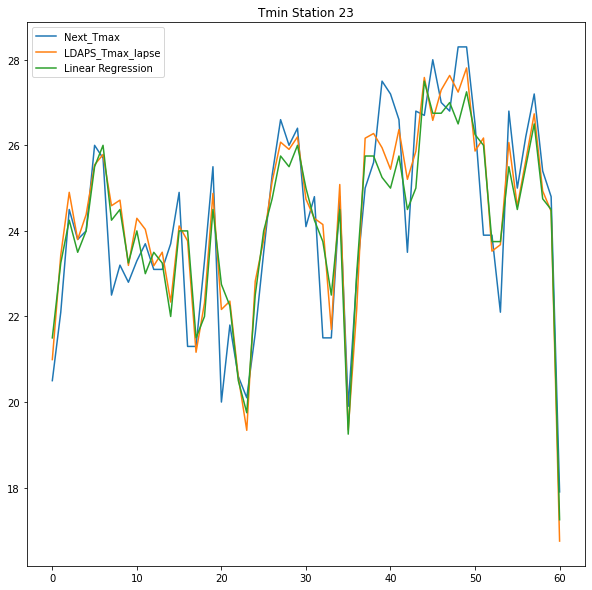

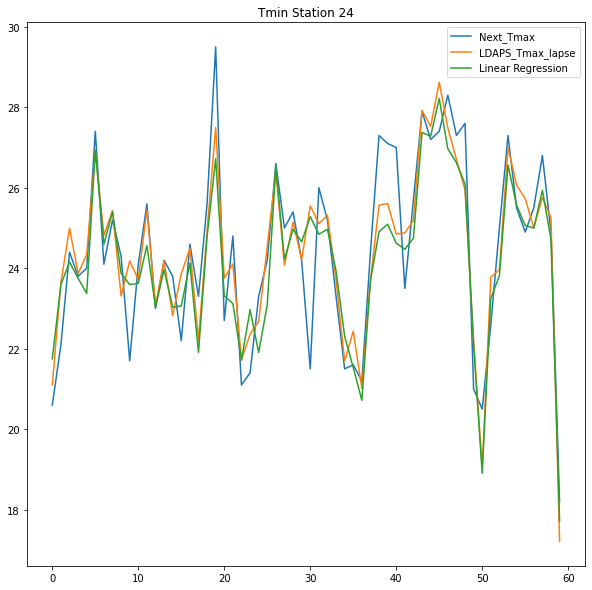

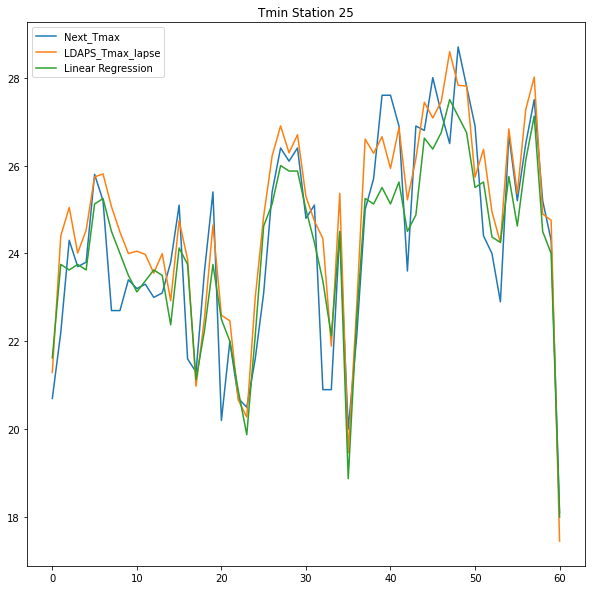

In [6]:
for variable in variables:
    for i in range(1, 26):
        plt.figure()
        plt.plot(np.array(data.y_test[i][f'Next_{variable}']))
        plt.plot(np.array(data.df_test[i][f'LDAPS_{variable}_lapse']))
        plt.plot(np.array(y_pred_linreg[variable][i]))

        plt.title(f'{variable} Station {i}')
        plt.legend(('Next_Tmax', 'LDAPS_Tmax_lapse', 'Linear Regression'))

The improvement can be seen clearly in some of the figures above, e.g., as can be seen for Station 2 Tmin.